In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
datos = pd.read_csv("./personas_hospitalizadas_intubadas_historico.csv")
datos

,fecha,entidad,hospitalizados,camas_intubados
0,2020-03-25,Ciudad de México,105,33
1,2020-03-25,Estado de México,0,0
2,2020-03-26,Ciudad de México,128,42
3,2020-03-26,Estado de México,0,0
4,2020-03-27,Ciudad de México,175,60
...,...,...,...,...
575,2020-12-27,Estado de México,2266,459
576,2020-12-29,Ciudad de México,5793,1538
577,2020-12-29,Estado de México,2309,474
578,2021-01-02,Ciudad de México,6044,1649


In [4]:
#se separan la fecha para extraer mes, año y dia
aux =pd.DataFrame(datos.fecha.apply(lambda dato : dato.split("-"))) 
aux

,fecha
0,"[2020, 03, 25]"
1,"[2020, 03, 25]"
2,"[2020, 03, 26]"
3,"[2020, 03, 26]"
4,"[2020, 03, 27]"
...,...
575,"[2020, 12, 27]"
576,"[2020, 12, 29]"
577,"[2020, 12, 29]"
578,"[2021, 01, 02]"


In [5]:
#se crea un segundo dataframe con las fechas
anho = pd.Series(aux.fecha.apply(lambda y: y[0]))
mes = pd.Series(aux.fecha.apply(lambda m: m[1]))
dia = pd.Series(aux.fecha.apply(lambda d: d[2]))
fecha = pd.DataFrame({"anho":anho,"mes":mes,"dia":dia})
fecha

,anho,mes,dia
0,2020,03,25
1,2020,03,25
2,2020,03,26
3,2020,03,26
4,2020,03,27
...,...,...,...
575,2020,12,27
576,2020,12,29
577,2020,12,29
578,2021,01,02


In [6]:
# se unen los dos data frame
datos = datos.drop(columns=["fecha"])
datos = pd.concat([datos,fecha],axis=1)
datos

,entidad,hospitalizados,camas_intubados,anho,mes,dia
0,Ciudad de México,105,33,2020,03,25
1,Estado de México,0,0,2020,03,25
2,Ciudad de México,128,42,2020,03,26
3,Estado de México,0,0,2020,03,26
4,Ciudad de México,175,60,2020,03,27
...,...,...,...,...,...,...
575,Estado de México,2266,459,2020,12,27
576,Ciudad de México,5793,1538,2020,12,29
577,Estado de México,2309,474,2020,12,29
578,Ciudad de México,6044,1649,2021,01,02


In [27]:
#se crea una tabla agrupada por entidad mes y año y se establecen loa valores maximos y minimos del mes y la sumatoria
datos.groupby(["entidad","anho","mes"]).camas_intubados.agg([max,min,sum,]).sort_values("sum",ascending=False)

max   min    sum
entidad          anho mes                   
Ciudad de México 2020 12   1568   895  37421
                      05   1123   816  30830
                      06   1097   913  30020
                      07    920   776  25972
                      11    931   716  24594
                      08    837   676  22670
                      10    750   656  21573
                      09    712   659  20599
                      04    845   124  12580
                 2021 01   1649  1581  11330
Estado de México 2020 12    502   246  10936
                      06    396   292  10134
                      05    396   198   9364
                      07    329   270   9265
                      08    288   186   7549
                      11    260   180   6477
                      10    212   156   5706
                      09    203   160   5632
                 2021 01    515   478   3474
                 2020 04    215     5   2831
Ciudad de México 2020 03    118    33    558
Estado de México 2020 03      5     0      9

In [18]:
mes_hosp = datos.groupby("mes").hospitalizados.sum().sort_values(ascending=False)
mes_hosp

mes
12    209878
06    178644
05    177355
07    147998
11    131183
08    124071
10    112288
09    110399
01     59792
04     56523
03      1625
Name: hospitalizados, dtype: int64

In [19]:
#Se realiza un resumen estadistico
mes_hosp.describe()

count        11.000000
mean     119068.727273
std       61271.019074
min        1625.000000
25%       85095.500000
50%      124071.000000
75%      162676.500000
max      209878.000000
Name: hospitalizados, dtype: float64

<AxesSubplot: xlabel='hospitalizados', ylabel='camas_intubados'>

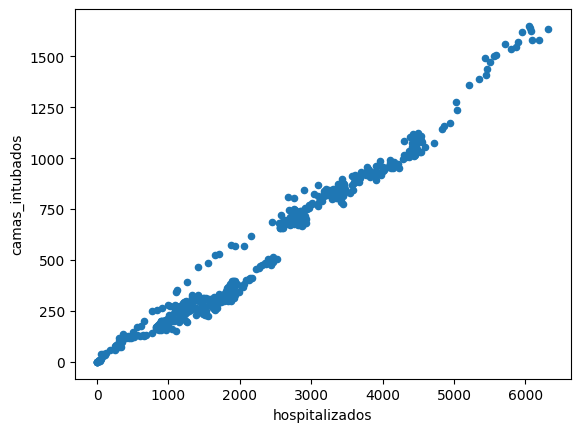

In [28]:
datos.plot.scatter(x="hospitalizados",y="camas_intubados")